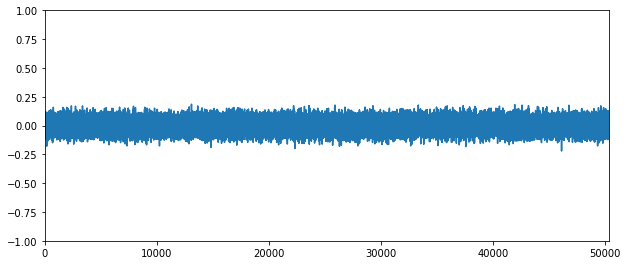

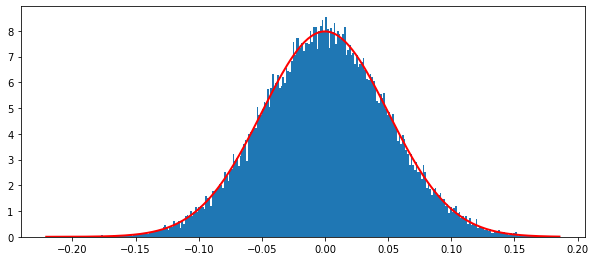

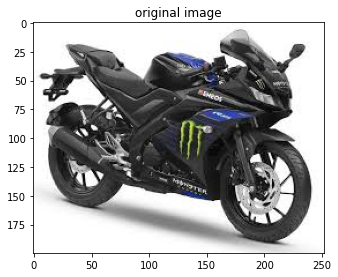

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


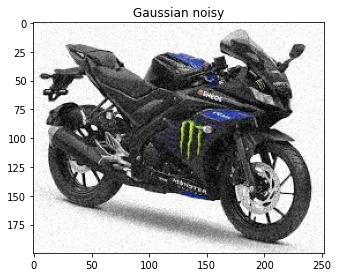

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


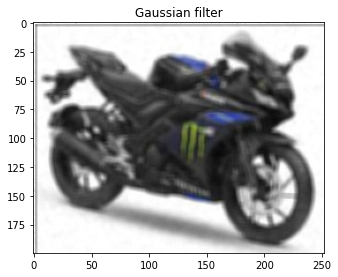

In [140]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 讀取原始影像
original_image = np.array(Image.open('./r15.jpeg'))
image = np.array(original_image/255, dtype=float)
image_b = image[:,:,0]
image_g = image[:,:,1]
image_r = image[:,:,2]


#創建高斯雜訊
mu, sigma = 0, 0.05# mean and standard deviation
noisy = np.random.normal(mu, sigma, image_b.shape) #Create Gaussian Noise
noisy_1d = [i for item in noisy for i in item] # trans Gaussian Noise dim into 1d
noisy_num = len(noisy_1d) # get number of noisy


# setting plt board info
left = 0.125 # the left side of the subplots of the figure 
right = 3 # the right side of the subplots of the figure 
bottom = 0.1 # the bottom of the subplots of the figure 
top = 0.9  # the top of the subplots of the figure 
wspace = 0.2 # the amount of width reserved for blank space between subplots 
hspace = 0.2 # the amount of height reserved for white space between subplots 

#Plot Gaussian Noise
plt.subplots_adjust(left, bottom, right, top, wspace, hspace) # 調校畫板大小參數
plt.subplot(1,2,1); 
plt.xlim(0,noisy_num)
plt.ylim(-1,1)
plt.plot(np.linspace(1, noisy_num, num = noisy_num), noisy_1d) 
plt.show()

# plot Gaussian Noise Distribution
plt.subplots_adjust(left, bottom, right, top, wspace, hspace) # 調校畫板大小參數
plt.subplot(1,2,2);
count, bins, ignored = plt.hist(noisy_1d, 300, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * 
         np.exp( - (bins - mu)**2 / (2 * sigma**2) ), 
         linewidth=2, color='r')
plt.show()

# plot original image 
plt.subplots_adjust(left, bottom, right, top, wspace, hspace) # 調校畫板大小參數
plt.subplot(1,2,1);
plt.imshow(image)
plt.title('original image')
plt.show()

# plot noisy image
image[:,:,0] = image_b + noisy
image[:,:,1] = image_g + noisy
image[:,:,2] = image_r + noisy

#image[:,:,0] = np.clip(0,1,image[:,:,0])
#image[:,:,1] = np.clip(0,1,image[:,:,1])
#image[:,:,2] = np.clip(0,1,image[:,:,2])

plt.subplots_adjust(left, bottom, right, top, wspace, hspace) # 調校畫板大小參數
plt.subplot(1,2,2);
plt.imshow(image)
plt.title('Gaussian noisy')
plt.show()


#3*3 Gassian filter
x, y = np.mgrid[-2:3, -2:3]
sigma = 0.01
gaussian_kernel = np.exp(-(x**2+y**2)/2*sigma**2) # 因為73行要做正規化故常數像可不考慮
gaussian_kernel = gaussian_kernel / gaussian_kernel.sum()

'''
plt.subplots_adjust(left, bottom, right, top, wspace, hspace) # 調校畫板大小參數
plt.imshow(gaussian_kernel, cmap=plt.get_cmap('jet'), interpolation='nearest')
plt.colorbar()
plt.show()
'''

# convolution
image_b = image[:,:,0]
image_g = image[:,:,1]
image_r = image[:,:,2]

image_b_copy = np.copy(image_b)
image_g_copy = np.copy(image_g)
image_r_copy = np.copy(image_r)

image_b_pad = np.pad(image_b, ((2,2),(2,2)), 'constant')
image_g_pad = np.pad(image_g, ((2,2),(2,2)), 'constant')
image_r_pad = np.pad(image_r, ((2,2),(2,2)), 'constant')

for h in range(2, image_b.shape[0] ):
    for w in range(2, image_b.shape[1] ):
        array_mutiply_b = image_b_pad[h - 2 : h + 3 , w - 2 : w + 3] * gaussian_kernel
        array_mutiply_g = image_g_pad[h - 2 : h + 3 , w - 2 : w + 3] * gaussian_kernel
        array_mutiply_r = image_r_pad[h - 2 : h + 3 , w - 2 : w + 3] * gaussian_kernel
        
        new_value_b = np.sum(array_mutiply_b) 
        new_value_g = np.sum(array_mutiply_g) 
        new_value_r = np.sum(array_mutiply_r) 
        
        image_b_copy[h, w] = new_value_b
        image_g_copy[h, w] = new_value_g
        image_r_copy[h, w] = new_value_r

image[:,:,0] = image_b_copy
image[:,:,1] = image_g_copy
image[:,:,2] = image_r_copy

plt.subplots_adjust(left, bottom, right, top, wspace, hspace) # 調校畫板大小參數
plt.imshow(image)
plt.title('Gaussian filter')
plt.show()


In [97]:
def image_ratio(image_src, basewidth):
    basewidth = basewidth
    img = Image.open(image_src)
    wpercent = (basewidth/float(img.size[0]))
    hsize = int((float(img.size[1])*float(wpercent)))
    img = img.resize((basewidth,hsize), Image.ANTIALIAS)
    return img

In [134]:
#3*3 Gassian filter
x, y = np.mgrid[-2:3, -2:3]
sigma = 0.7
gaussian_kernel = np.exp(-(x**2+y**2)/2*sigma**2)
gaussian_kernel = gaussian_kernel / gaussian_kernel.sum()
gaussian_kernel

array([[0.0128099 , 0.02671481, 0.03413141, 0.02671481, 0.0128099 ],
       [0.02671481, 0.05571325, 0.07118043, 0.05571325, 0.02671481],
       [0.03413141, 0.07118043, 0.09094164, 0.07118043, 0.03413141],
       [0.02671481, 0.05571325, 0.07118043, 0.05571325, 0.02671481],
       [0.0128099 , 0.02671481, 0.03413141, 0.02671481, 0.0128099 ]])